### This howework is a joint effort of 

- Pinaki Bhagat
- Sydney Correa

The homework is split into 2 python notebooks and covers different aspects of the problem statement.

###### Import all required Python libraries

In [3]:
# Basic Python libraries
import pandas as pd
import numpy as np
# LDA, tSNE
from sklearn.manifold import TSNE
from gensim.models.ldamodel import LdaModel
# NLTK
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
import re
# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns
# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

C:\Users\pinakibhagat\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Loading BokehJS ...

In [2]:
import xlrd
#df = xlrd.open_workbook("abstract2.xlsx")

###### Load the abstract file

In [4]:
df_abs = pd.read_csv("C:\\Users\\pinakibhagat\\Downloads\\Personal\\Harvard\\CSCIE-82\\Week 2\\abstract2_csv.csv",encoding = "ISO-8859-1")
print(df_abs.abstract2[2][:1000])

 In modeling studies or memory based on neural networks, both the selective enhancement and depression or synaptic strengths are required ror effident storage or inrormation (Sejnowski, 1977a,b; Kohonen, 1984; Bienenstock et aI, 1982; Sejnowski and Tesauro, 1989). We have tested this assumption in the hippocampus, a cortical structure or the brain that is involved in long-term memory. A brier, high-frequency activation or excitatory synapses in the hippocampus produces an increase in synaptic strength known as long-term potentiation, or LTP (BUss and Lomo, 1973), that can last ror many days. LTP is known to be Hebbian since it requires the simultaneous release or neurotransmitter from presynaptic terminals coupled with postsynaptic depolarization (Kelso et al, 1986; Malinow and Miller, 1986; Gustatrson et al, 1987). However, a mechanism ror the persistent reduction or synaptic strength that could balance LTP has not yet been demonstrated. We studied the associative interactions between

###### Load the original full file

In [5]:
df_orig = pd.read_csv("C:\\Users\\pinakibhagat\\Downloads\\Personal\\Harvard\\CSCIE-82\\Week 2\\papers.csv")
print(df_orig.paper_text[2][:1000])

394

STORING COVARIANCE BY THE ASSOCIATIVE
LONG?TERM POTENTIATION AND DEPRESSION
OF SYNAPTIC STRENGTHS IN THE HIPPOCAMPUS
Patric K. Stanton? and Terrence J. Sejnowski t
Department of Biophysics
Johns Hopkins University
Baltimore, MD 21218
ABSTRACT

In modeling studies or memory based on neural networks, both the selective
enhancement and depression or synaptic strengths are required ror effident storage
or inrormation (Sejnowski, 1977a,b; Kohonen, 1984; Bienenstock et aI, 1982;
Sejnowski and Tesauro, 1989). We have tested this assumption in the hippocampus,
a cortical structure or the brain that is involved in long-term memory. A brier,
high-frequency activation or excitatory synapses in the hippocampus produces an
increase in synaptic strength known as long-term potentiation, or LTP (BUss and
Lomo, 1973), that can last ror many days. LTP is known to be Hebbian since it
requires the simultaneous release or neurotransmitter from presynaptic terminals
coupled with postsynaptic depolariza

###### Merge two dataframes and add 'abstract2' to original dataframe

In [6]:
df_mod = pd.merge(df_orig,df_abs[['id','abstract2']],on='id', how='left')

In [8]:
df_mod.shape

(7241, 8)

###### Initial cleaning - removing numbers, special characters and convert case

In [9]:
# Removing numbers:
df_mod['abstract2_tokens'] = df_mod.abstract2.map(lambda x: re.sub(r'\d+', '', str(x)))

# Removing special characters
df_mod['abstract2_tokens'] = df_mod.abstract2.map(lambda x: re.sub(r'[-.,;()\@?$%]', '', str(x)))

# Converting to lower case:
df_mod['abstract2_tokens'] = df_mod.abstract2_tokens.map(lambda x: x.lower())
print(df_mod['abstract2_tokens'][2][:2000])

 in modeling studies or memory based on neural networks both the selective enhancement and depression or synaptic strengths are required ror effident storage or inrormation sejnowski 1977ab kohonen 1984 bienenstock et ai 1982 sejnowski and tesauro 1989 we have tested this assumption in the hippocampus a cortical structure or the brain that is involved in longterm memory a brier highfrequency activation or excitatory synapses in the hippocampus produces an increase in synaptic strength known as longterm potentiation or ltp buss and lomo 1973 that can last ror many days ltp is known to be hebbian since it requires the simultaneous release or neurotransmitter from presynaptic terminals coupled with postsynaptic depolarization kelso et al 1986 malinow and miller 1986 gustatrson et al 1987 however a mechanism ror the persistent reduction or synaptic strength that could balance ltp has not yet been demonstrated we studied the associative interactions between separate inputs onto the same den

###### Tokenize the words for further steps

In [10]:
df_mod['abstract2_tokens'] = df_mod.abstract2_tokens.map(lambda x: RegexpTokenizer(r'\w+').tokenize(x))
print(df_mod['abstract2_tokens'][2])

['in', 'modeling', 'studies', 'or', 'memory', 'based', 'on', 'neural', 'networks', 'both', 'the', 'selective', 'enhancement', 'and', 'depression', 'or', 'synaptic', 'strengths', 'are', 'required', 'ror', 'effident', 'storage', 'or', 'inrormation', 'sejnowski', '1977ab', 'kohonen', '1984', 'bienenstock', 'et', 'ai', '1982', 'sejnowski', 'and', 'tesauro', '1989', 'we', 'have', 'tested', 'this', 'assumption', 'in', 'the', 'hippocampus', 'a', 'cortical', 'structure', 'or', 'the', 'brain', 'that', 'is', 'involved', 'in', 'longterm', 'memory', 'a', 'brier', 'highfrequency', 'activation', 'or', 'excitatory', 'synapses', 'in', 'the', 'hippocampus', 'produces', 'an', 'increase', 'in', 'synaptic', 'strength', 'known', 'as', 'longterm', 'potentiation', 'or', 'ltp', 'buss', 'and', 'lomo', '1973', 'that', 'can', 'last', 'ror', 'many', 'days', 'ltp', 'is', 'known', 'to', 'be', 'hebbian', 'since', 'it', 'requires', 'the', 'simultaneous', 'release', 'or', 'neurotransmitter', 'from', 'presynaptic', 'te

###### Remove all stopwords

In [11]:
stop_en = set(stopwords.words('english'))
stop_en = stop_en.union(['i','br','et','al'])  # add some stopwords
stopped_doc_tokens = []
for doc in df_mod['abstract2_tokens']:
    stopped_doc_tokens.append([word for word in doc if not word in stop_en])
print(stopped_doc_tokens[2])
df_mod['abstract2_tokens']=stopped_doc_tokens

['modeling', 'studies', 'memory', 'based', 'neural', 'networks', 'selective', 'enhancement', 'depression', 'synaptic', 'strengths', 'required', 'ror', 'effident', 'storage', 'inrormation', 'sejnowski', '1977ab', 'kohonen', '1984', 'bienenstock', 'ai', '1982', 'sejnowski', 'tesauro', '1989', 'tested', 'assumption', 'hippocampus', 'cortical', 'structure', 'brain', 'involved', 'longterm', 'memory', 'brier', 'highfrequency', 'activation', 'excitatory', 'synapses', 'hippocampus', 'produces', 'increase', 'synaptic', 'strength', 'known', 'longterm', 'potentiation', 'ltp', 'buss', 'lomo', '1973', 'last', 'ror', 'many', 'days', 'ltp', 'known', 'hebbian', 'since', 'requires', 'simultaneous', 'release', 'neurotransmitter', 'presynaptic', 'terminals', 'coupled', 'postsynaptic', 'depolarization', 'kelso', '1986', 'malinow', 'miller', '1986', 'gustatrson', '1987', 'however', 'mechanism', 'ror', 'persistent', 'reduction', 'synaptic', 'strength', 'could', 'balance', 'ltp', 'yet', 'demonstrated', 'stud

######  Perform stemming on the tokenized words

In [12]:
stopstem_doc_tokens = []
for doc in df_mod['abstract2_tokens']:
    stopstem_doc_tokens.append([PorterStemmer().stem(word) for word in doc])

print(len(stopstem_doc_tokens))
print(stopstem_doc_tokens[2])
df_mod['abstract2_tokens']=stopstem_doc_tokens

7241
['model', 'studi', 'memori', 'base', 'neural', 'network', 'select', 'enhanc', 'depress', 'synapt', 'strength', 'requir', 'ror', 'effid', 'storag', 'inrorm', 'sejnowski', '1977ab', 'kohonen', '1984', 'bienenstock', 'ai', '1982', 'sejnowski', 'tesauro', '1989', 'test', 'assumpt', 'hippocampu', 'cortic', 'structur', 'brain', 'involv', 'longterm', 'memori', 'brier', 'highfrequ', 'activ', 'excitatori', 'synaps', 'hippocampu', 'produc', 'increas', 'synapt', 'strength', 'known', 'longterm', 'potenti', 'ltp', 'buss', 'lomo', '1973', 'last', 'ror', 'mani', 'day', 'ltp', 'known', 'hebbian', 'sinc', 'requir', 'simultan', 'releas', 'neurotransmitt', 'presynapt', 'termin', 'coupl', 'postsynapt', 'depolar', 'kelso', '1986', 'malinow', 'miller', '1986', 'gustatrson', '1987', 'howev', 'mechan', 'ror', 'persist', 'reduct', 'synapt', 'strength', 'could', 'balanc', 'ltp', 'yet', 'demonstr', 'studi', 'associ', 'interact', 'separ', 'input', 'onto', 'dendrit', 'tree', 'hippocamp', 'pyramid', 'cell', 'f

###### Final cleaning to remove all words less than 2 characters long

In [13]:
stoplen_doc_tokens = []
for doc in df_mod['abstract2_tokens']:
    stoplen_doc_tokens.append([word for word in doc if len(word) > 1])

print(stoplen_doc_tokens[2])
df_mod['abstract2_tokens']=stoplen_doc_tokens

['model', 'studi', 'memori', 'base', 'neural', 'network', 'select', 'enhanc', 'depress', 'synapt', 'strength', 'requir', 'ror', 'effid', 'storag', 'inrorm', 'sejnowski', '1977ab', 'kohonen', '1984', 'bienenstock', 'ai', '1982', 'sejnowski', 'tesauro', '1989', 'test', 'assumpt', 'hippocampu', 'cortic', 'structur', 'brain', 'involv', 'longterm', 'memori', 'brier', 'highfrequ', 'activ', 'excitatori', 'synaps', 'hippocampu', 'produc', 'increas', 'synapt', 'strength', 'known', 'longterm', 'potenti', 'ltp', 'buss', 'lomo', '1973', 'last', 'ror', 'mani', 'day', 'ltp', 'known', 'hebbian', 'sinc', 'requir', 'simultan', 'releas', 'neurotransmitt', 'presynapt', 'termin', 'coupl', 'postsynapt', 'depolar', 'kelso', '1986', 'malinow', 'miller', '1986', 'gustatrson', '1987', 'howev', 'mechan', 'ror', 'persist', 'reduct', 'synapt', 'strength', 'could', 'balanc', 'ltp', 'yet', 'demonstr', 'studi', 'associ', 'interact', 'separ', 'input', 'onto', 'dendrit', 'tree', 'hippocamp', 'pyramid', 'cell', 'field'

In [14]:
df_mod.head(5)

,id,year,title,event_type,pdf_name,abstract,paper_text,abstract2,abstract2_tokens
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,An efficient method of self-organizing associa...,"[effici, method, selforgan, associ, databas, p..."
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,A single cell theory for the development of se...,"[singl, cell, theori, develop, select, ocular,..."
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,In modeling studies or memory based on neural...,"[model, studi, memori, base, neural, network, ..."
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,"If data collection is costly, there is much to...","[data, collect, costli, much, gain, activ, sel..."
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",Learning of continuous valued functions using ...,"[learn, continu, valu, function, use, neural, ..."


###### Build a corpus at year level for trend analysis

In [15]:
# Group by year to define the number of corpus needed
aggr = pd.DataFrame(df_mod.groupby('year').count())
aggr = aggr.reset_index()
aggr = aggr[['year','id']]
row_cnt = aggr.shape[0]
x = []
y=0
# Append the cummulative year count into a new column
for i in range(row_cnt):
    y = y + aggr['id'][i]
    x.append(y)
    globals()['corpus%s' % i] = []
    globals()['corpus_flat%s' % i] = []
    globals()['counts%s' % i] = []
    globals()['words%s' % i] = []
    globals()['dict%s' % i] = []
aggr['cumm'] = x

# Sort the original DF using year and build a corpus for every year
df_mod1 = df_mod.sort_values('year')
df_mod1 = df_mod1.reset_index()

z_bef = 0
for i in range(row_cnt):
    z_aft = aggr['cumm'][i]
    for j in range(z_bef,z_aft):
        globals()['corpus%s' % i].append(df_mod1['abstract2_tokens'][j])
    z_bef = aggr['cumm'][i]

# Corpus0,words0,dict0 to Corpus30,words30,dict30 created using the tokens for every year

In [16]:
# Flatten all the yearly corpuses to find out top 10 frequency words every year
from collections import Counter

for i in range(row_cnt):
    for sublist in globals()['corpus%s' % i]:
        for item in sublist:
            globals()['corpus_flat%s' % i].append(item)
    globals()['counts%s' % i] = Counter(globals()['corpus_flat%s' % i]).most_common(10)

In [17]:
# Convert the list to a dataframe having word and frequency column for every year
labels = ['word','frequency']
yr = 1987
for i in range(row_cnt):
    globals()['counts_df%s' % i] = pd.DataFrame.from_records(globals()['counts%s' % i],columns=labels)
    globals()['counts_df%s' % i]['year'] = yr
    yr = yr+1

In [18]:
# Concatenate all yearly dataframes into 1 single dataframe and group by word and year
counts_con_df = pd.DataFrame()
word_freq = pd.DataFrame()
for i in range(row_cnt):
    counts_con_df = counts_con_df.append(globals()['counts_df%s' % i],ignore_index=True)

word_freq = pd.DataFrame(counts_con_df.groupby(['word','year']).sum()) #.sort_values(by='frequency',ascending=False)

In [59]:
# Find out all unique words for plotting
counts_con_df['word'].unique()

array(['network', 'neural', 'model', 'use', 'system', 'learn', 'neuron',
       'connect', 'gener', 'pattern', 'algorithm', 'train', 'perform',
       'problem', 'function', 'method', 'input', 'present', 'result',
       'data', 'approach', 'show', 'set', 'propos', 'imag', 'estim',
       'optim'], dtype=object)

###### Visualize top words using wordcloud

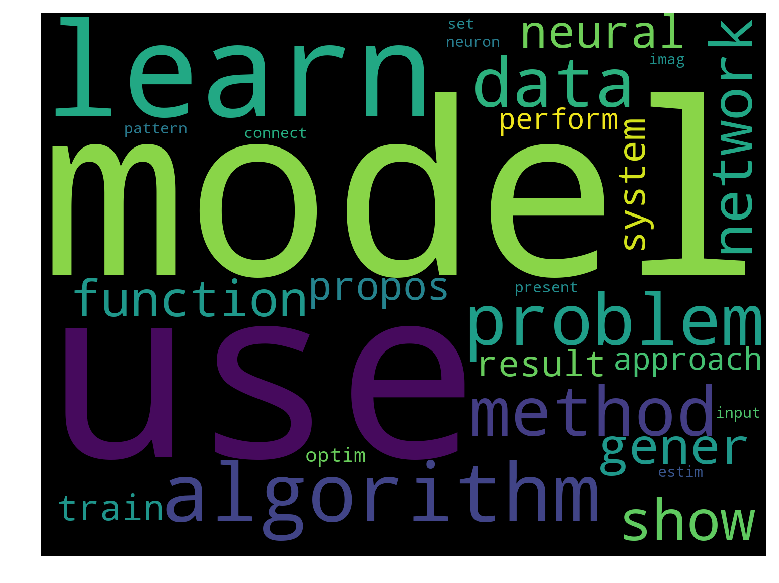

In [60]:
# Plot using wordcloud to visualize relative significance of words
from wordcloud import WordCloud
train_qs = pd.Series(counts_con_df['word'].tolist()).astype(str)
qs_text = " ".join(train_qs)
cloud = WordCloud(width=1440, height=1080).generate(qs_text)
plt.figure(figsize=(15, 10))
plt.imshow(cloud);
plt.axis('off');

###### Plot usage trend over the years for highly used words

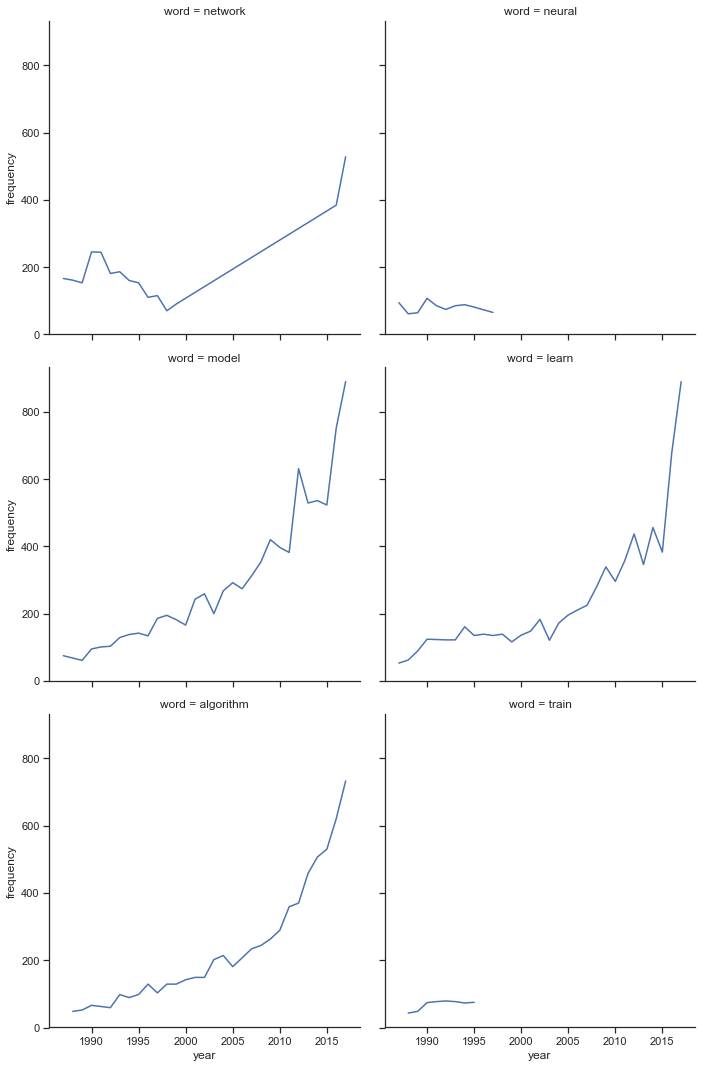

In [58]:
# Plot the top 6 words usage with respect to time (1987-2017)
sns.set(style="ticks")
plot_df = pd.DataFrame(counts_con_df.query('word in ["network","neural","model","algorithm","learn","train"]'))
g = sns.relplot(x="year", y="frequency", kind="line", col="word", col_wrap=2,data=plot_df)

In [27]:
################################################################################################################
##################### SCRATCH - TO BE IGNORED ##################################################################
################################################################################################################

#aggr = []
#aggr = df_mod['year'].value_counts()
#aggr = aggr.sort_values(ascending=True)
#print(aggr)
#df_mod1 = df_mod.sort_values('year')
#df_mod1 = df_mod1.reset_index()
#row_cnt1 = df_mod1.shape[0]
#for i in range(row_cnt1):
#    if(df_mod1['year'][i+1] == df_mod1['year'][i]):
#        print(i)
#    else:
#        print("bye")
#aggr = []
#a = []
#b = []
#aggr = df_mod['year'].value_counts()
#aggr = aggr.sort_values(ascending=True)
#for i, v in enumerate(aggr):
#    a.append(i)
#    b.append(v)
#aggr = df_mod
#aggr = df_mod['year'].value_counts()
#aggr = pd.DataFrame(df_mod.groupby('year').count())
#aggr = aggr.reset_index()
#aggr = aggr[['year','id']]
#row_cnt = aggr.shape[0]
#x = []
#y=0
#for i in range(row_cnt):
#    y = y + aggr['id'][i]
#    x.append(y)
#    print(i)
#    globals()['corpus%s' % i] = []
#aggr['cumm'] = x
#aggr
#aggr['Counts'] = aggr['id'].aggr.groupby(aggr['year']).transform('sum')
#aggr = aggr.sort_values(ascending=True)
#aggr = aggr['id']
#x= aggr[0:1]
#print(aggr[0:1])
#for i in aggr.count()
#    new_id = 
#aggr_pd = pd.DataFrame(data=aggr)
#aggr_pd.columns = ['year','count']
#aggr_pd
#for i in range(row_cnt):
#for i in range(row_cnt1):
#    if(df_mod['year'][i+1] == df_mod['year'][i])
#    z = aggr['cumm'][i]
#    for x in range(z):
#        globals()['corpus%s' % i].append(df_mod['abstract2_tokens'][x])

#row_cnt1 = df_mod.shape[0]
#corpus0_df = pd.DataFrame.from_records(corpus0)
#corpus0_df_lst.append(corpus0_df[1].tolist())
#corpus0_df_lst
#words0_df = pd.DataFrame.from_records(words0)
#corpus0_df_lst = []
#for i in range(corpus0_df.shape[0]):
#    for j in range(corpus0_df.shape[1]):
#         if(corpus0_df.loc[i,j] != None):
#            corpus0_df_lst.append(corpus0_df.loc[i,j])
#for i in range(row_cnt):
#    globals()['corpus_df%s' % i] = pd.DataFrame.from_records(globals()['corpus%s' % i])
#    for j in range(globals()['corpus_df%s' % i].shape[0]):
#        for k in range(globals()['corpus_df%s' % i].shape[1]):
#             if(globals()['corpus_df%s' % i].loc[j,k] != None):
#                globals()['corpus_df_lst%s' % i].append(globals()['corpus_df%s' % i].loc[j,k])
#from gensim import corpora, models 
#dictionary = corpora.Dictionary(corpus0)
#j=0
#wd = []
#for x in corpus0:
#    dct = dictionary.doc2bow(corpus0[j])
#    wd.append([(dictionary[id], freq) for id, freq in dct if freq>1])
#    j=j+1
#wd = list(filter(None, wd))

# Get frequency of every word for every year and select words that appear in a year only more than 5 times
#from gensim import corpora, models 
#dictionary = corpora.Dictionary(corpus0)
#for i in range(row_cnt):
#    j=0
#    for x in globals()['corpus%s' % i]:
#        globals()['dict%s' % i] = dictionary.doc2bow(globals()['corpus%s' % i][j])
#        globals()['words%s' % i].append([(dictionary[id], freq) for id, freq in globals()['dict%s' % i] if freq>5])
#        j=j+1
#    globals()['words%s' % i] = list(filter(None, globals()['words%s' % i]))
#freq_doc_tokens = []
#for doc in range(2):
#    doc1 = df['abstract2_tokens'][doc]
#    freq_doc_tokens = FreqDist(doc1)
#for key in freq_doc_tokens:
#    print(key + ':', fdist[key], end='; ')
#labels = ['word','frequency']
#counts0_df = pd.DataFrame.from_records(counts0,columns=labels)
#counts0_df['year'] = '1987'
#counts0_df

#labels = ['word','frequency']
#counts1_df = pd.DataFrame.from_records(counts1,columns=labels)
#counts1_df['year'] = '1988'
#counts1_df

#labels = ['word','frequency']
#counts2_df = pd.DataFrame.from_records(counts2,columns=labels)
#counts2_df['year'] = '1989'
#counts2_df
#counts_con_df = pd.concat([counts0_df,counts1_df],axis=0)
#if (counts2_df['word'] == 'network'):
#z = ['network']
#word_freq.head()
#i=0
#for x in counts_con_df['word']:
#    if (x in z):
#        print(x)
#        print(counts_con_df['frequency'])
#        #print(counts_con_df['frequency'][i])
#        i=i+1
#!pip install wordcloud
#g.fig.autofmt_xdate()